#### Домашнее задание "Случайные марковские процессы"

- Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

- Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
a = ord('а')
RUS = ''.join([chr(i) for i in range(a,a+6)] + [chr(a+33)] + [chr(i) for i in range(a+6,a+32)]).upper()
RUS += ''.join([chr(i) for i in range(a,a+6)] + [chr(a+33)] + [chr(i) for i in range(a+6,a+32)])
RUS

'АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдеёжзийклмнопрстуфхцчшщъыьэюя'

In [5]:
with open('tom_1.txt', 'r', encoding='utf-8') as f:
    text1 = f.read()
with open('tom_2.txt', 'r', encoding='utf-8') as f:
    text2 = f.read()
with open('tom_3.txt', 'r', encoding='utf-8') as f:
    text3 = f.read()
with open('tom_4.txt', 'r', encoding='utf-8') as f:
    text4 = f.read()
text = text1 +  text2 + text3 + text4      
text = re.sub('[^А-Яа-я]',' ', text)
# text = re.sub('[\s]*',' ', text)
text[-1000:]

'тобы отказаться от непосредственного чувства неподвижности земли и такого же чувства движения планет  так и для истории трудность признания подчиненности личности законам пространства  времени и причин состоит в том  чтобы отказаться от непосредственного чувства независимости своей личности  Но  как в астрономии новое воззрение говорило   Правда  мы не чувствуем движения земли  но  допустив ее неподвижность  мы приходим к бессмыслице  допустив же движение  которого мы не чувствуем  мы приходим к законам     так и в истории новое воззрение говорит   И правда  мы не чувствуем нашей зависимости  но  допустив нашу свободу  мы приходим к бессмыслице  допустив же свою зависимость от внешнего мира  времени и причин  приходим к законам    В первом случае надо было отказаться от сознания несуществующей неподвижности в пространстве и признать неощущаемое нами движение  в настоящем случае   точно так же необходимо отказаться от несуществующей свободы и признать неощущаемую нами зависимость      

In [6]:
POS = {l: i for i, l in enumerate(RUS)}

In [7]:
probabilities = np.zeros((len(RUS), len(RUS)))

In [8]:
for cp, cn in zip(text[:-1], text[1:]):
    if cp == ' ' or cn == ' ':
        continue
    else:       
        probabilities[POS[cp], POS[cn]] += 1

In [9]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [10]:
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))

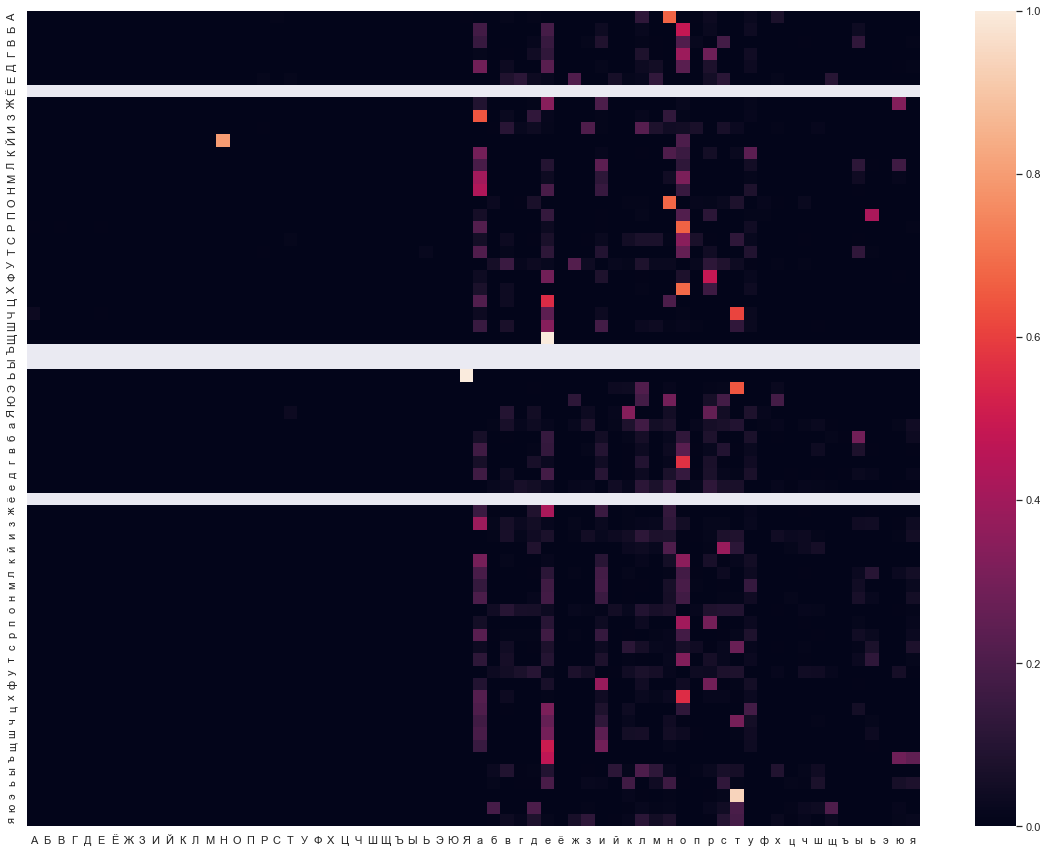

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(df)
plt.show()

1. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р;

In [31]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUS)
res = dict()
for c1 in RUS[:-1]:
    for c2 in RUS[:-1]:
        prob = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if prob > 0:
            print(''.join(['п', c1, c2, 'р']), prob)

паар 4.317472819139864e-09
пабр 7.26169234593664e-07
павр 9.610549047780261e-07
пагр 8.522036086664467e-07
падр 2.081632731497105e-06
паер 1.7761922305169684e-06
пажр 5.195603801657114e-09
пазр 9.258144658185243e-07
паир 2.3336319278296656e-08
пайр 8.642532899812576e-08
пакр 3.978194149173261e-06
памр 1.0280120403205135e-07
панр 7.108922976172107e-08
паор 6.999078813744534e-09
папр 3.929765154932125e-06
парр 1.652995386223804e-08
паср 3.6843447320137366e-07
патр 4.154559288252903e-06
паур 4.67823551577855e-08
пафр 2.3088082664671284e-06
пахр 2.529178865578716e-07
пачр 1.7530955214810244e-08
пашр 3.701252754109046e-09
пащр 3.1526952659319256e-09
паэр 5.2360365314611585e-11
паюр 2.5334765462737675e-07
пгар 1.788455769373678e-08
пгвр 2.416506647485829e-10
пггр 2.6908314781913338e-11
пгдр 2.672416439145686e-08
пгер 2.0144523084986703e-08
пгзр 2.025667807491208e-12
пгир 3.3677072279844694e-09
пгкр 1.7475093381897786e-09
пгмр 9.681581090884888e-13
пгнр 1.0900991260651397e-10
пгор 2.594349222

2. Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [39]:
s = []
start = 'б'
s.append(start)
length = 8
pro = probabilities[:-1, :-1]
for i in range(length-1):
    index = POS[s[i]]
    next_char = np.random.choice(list(POS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

беторены


3. Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [21]:
from hmmlearn.hmm import GaussianHMM

In [25]:
series = pd.read_csv("C:/Users/BEU_RU1/Нетология/TSML/1._Лекция/Series/weekly-closings-of-the-dowjones-.csv")["Close"]

In [26]:
values = series.values.reshape(-1,1)

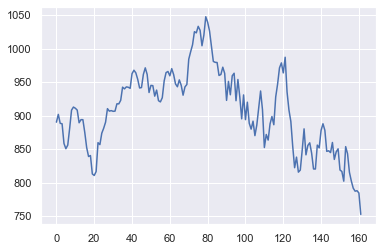

In [40]:
plt.plot(series)

In [45]:
for n in range(1, 11):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582104
2 -820.6341453620569
3 -786.8375332667733
4 -752.0204754569381
5 -737.1181111930917
6 -729.5671112589446
7 -713.7233991716987
8 -702.1071055163595
9 -690.983806820968
10 -682.1267008564855


<function matplotlib.pyplot.legend(*args, **kwargs)>

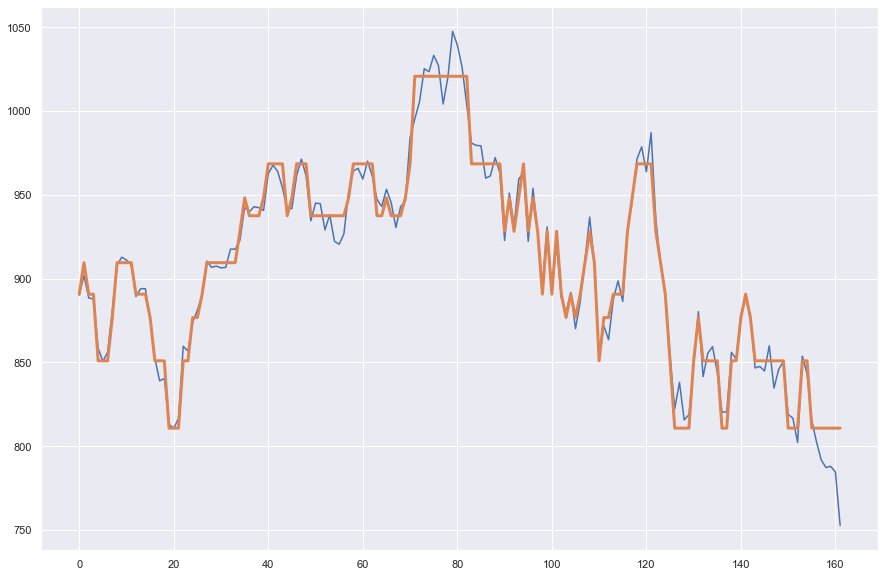

In [47]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(15, 10))
plt.plot(values)
plt.plot(means, linewidth=3)
plt.legend

при 10 компонентах достаточно хорошо описывается временной ряд

##### матрица переходных состояний

<AxesSubplot:>

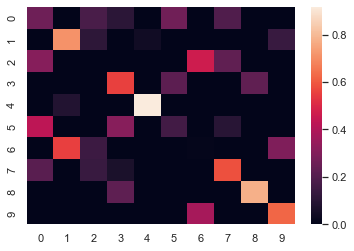

In [48]:
sns.heatmap(model.transmat_)

##### Попробуем предсказать методом наивного Байеса. У нас есть матрица вероятностей переходов между состояниями. Берем последний элемент известной последовательности и согласно матрицы находим следующее скрытое состояние, а уже на его основе наблюдаемое значение.

In [49]:
hidden_series = labels[-1]
prediction = []
for i in range(20):
    next = np.random.choice(10, p=model.transmat_[hidden_series])
    prediction.append(model.means_[next])

In [50]:
prediction

[array([850.89677044]),
 array([810.73324342]),
 array([810.73324342]),
 array([810.73324342]),
 array([810.73324342]),
 array([850.89677044]),
 array([810.73324342]),
 array([810.73324342]),
 array([810.73324342]),
 array([810.73324342]),
 array([810.73324342]),
 array([810.73324342]),
 array([810.73324342]),
 array([810.73324342]),
 array([810.73324342]),
 array([810.73324342]),
 array([810.73324342]),
 array([810.73324342]),
 array([810.73324342]),
 array([850.89677044])]

In [51]:
range(len(values), 20)

range(162, 20)

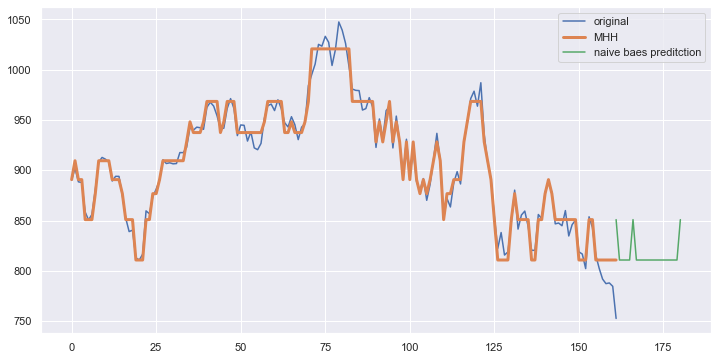

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(values, label = 'original')
plt.plot(means, linewidth=3, label = 'MHH')
plt.plot(range(len(values)-1, len(values) + 20-1), prediction, label = 'naive baes preditction')
plt.legend()